In [1]:
from PIL import Image

In [2]:
 def __int_to_bin(rgb):
        """Convert an integer tuple to a binary (string) tuple.
        :param rgb: An integer tuple (e.g. (220, 110, 96))
        :return: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        """
        r, g, b = rgb
        return ('{0:08b}'.format(r),
                '{0:08b}'.format(g),
                '{0:08b}'.format(b))

In [3]:
 def __bin_to_int(rgb):
        """Convert a binary (string) tuple to an integer tuple.
        :param rgb: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        :return: Return an int tuple (e.g. (220, 110, 96))
        """
        r, g, b = rgb
        return (int(r, 2),
                int(g, 2),
                int(b, 2))

In [4]:
def __merge_rgb(rgb1, rgb2):
        """Merge two RGB tuples.
        :param rgb1: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        :param rgb2: Another string tuple
        (e.g. ("00101010", "11101011", "00010110"))
        :return: An integer tuple with the two RGB values merged.
        """
        r1, g1, b1 = rgb1
        r2, g2, b2 = rgb2
        rgb = (r1[:4] + r2[:4],
               g1[:4] + g2[:4],
               b1[:4] + b2[:4])
        return rgb

In [5]:
 def merge(img1, img2):
        """Merge two images. The second one will be merged into the first one.
        :param img1: First image
        :param img2: Second image
        :return: A new merged image.
        """

        # Check the images dimensions
        if img2.size[0] > img1.size[0] or img2.size[1] > img1.size[1]:
            raise ValueError('Image 2 should not be larger than Image 1!')

        # Get the pixel map of the two images
        pixel_map1 = img1.load()
        pixel_map2 = img2.load()

        # Create a new image that will be outputted
        new_image = Image.new(img1.mode, img1.size)
        pixels_new = new_image.load()

        for i in range(img1.size[0]):
            for j in range(img1.size[1]):
                rgb1 = __int_to_bin(pixel_map1[i, j])

                # Use a black pixel as default
                rgb2 = __int_to_bin((0, 0, 0))

                # Check if the pixel map position is valid for the second image
                if i < img2.size[0] and j < img2.size[1]:
                    rgb2 = __int_to_bin(pixel_map2[i, j])

                # Merge the two pixels and convert it to a integer tuple
                rgb = __merge_rgb(rgb1, rgb2)

                pixels_new[i, j] = __bin_to_int(rgb)

        return new_image

In [6]:
def unmerge(img):
        """Unmerge an image.
        :param img: The input image.
        :return: The unmerged/extracted image.
        """

        # Load the pixel map
        pixel_map = img.load()

        # Create the new image and load the pixel map
        new_image = Image.new(img.mode, img.size)
        pixels_new = new_image.load()

        # Tuple used to store the image original size
        original_size = img.size

        for i in range(img.size[0]):
            for j in range(img.size[1]):
                # Get the RGB (as a string tuple) from the current pixel
                r, g, b = __int_to_bin(pixel_map[i, j])

                # Extract the last 4 bits (corresponding to the hidden image)
                # Concatenate 4 zero bits because we are working with 8 bit
                rgb = (r[4:] + '0000',
                       g[4:] + '0000',
                       b[4:] + '0000')

                # Convert it to an integer tuple
                pixels_new[i, j] = __bin_to_int(rgb)

                # If this is a 'valid' position, store it
                # as the last valid position
                if pixels_new[i, j] != (0, 0, 0):
                    original_size = (i + 1, j + 1)

        # Crop the image based on the 'valid' pixels
        new_image = new_image.crop((0, 0, original_size[0], original_size[1]))

        return new_image

In [9]:
img1="E:/6th sem/dataset/train/img4.jpg"
img2="E:/6th sem/dataset/test/0.jpg"
output="E:/6th sem/dataset/MergedImage.png"
finalout="E:/6th sem/dataset/UnmergedImage.png"

In [8]:
merged_image = merge(Image.open(img1), Image.open(img2))
merged_image.save(output)

FileNotFoundError: [Errno 2] No such file or directory: 'E:/6th sem/dataset/train/img4.jpg'

In [21]:
unmerged_image = unmerge(Image.open(output))
unmerged_image.save(finalout)

The image that will cover our secrete image


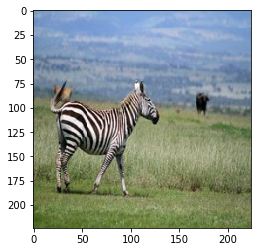

In [22]:
import cv2
import matplotlib.pyplot as plt

im = cv2.imread('E:/6th sem/dataset/train/img4.jpg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
print("The image that will cover our secrete image")
plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

The secrete Image


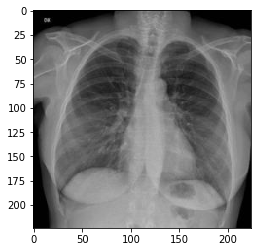

In [23]:
import cv2
import matplotlib.pyplot as plt

im = cv2.imread('E:/6th sem/dataset/test/0.jpg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
print("The secrete Image")
plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

Merged Image


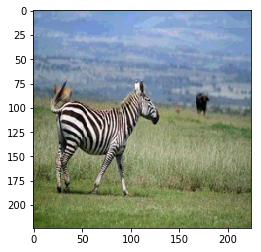

In [24]:
import cv2
import matplotlib.pyplot as plt

im = cv2.imread('E:/6th sem/dataset/MergedImage.png')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
print("Merged Image")
plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

In [25]:
import cv2
import matplotlib.pyplot as plt

im = cv2.imread('E:/6th sem/dataset/UnmergedImage.jpg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
print("Unmerged Image")
plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-ewo4gv_0\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [27]:
from PIL import Image


host_image = Image.open('E:/6th sem/dataset/train/img4.jpg','r') #open image 
secret_image = Image.open('E:/6th sem/dataset/test/0.jpg','r') #open imag

In [28]:
pixel_value_hostimage = list(host_image.getdata()) #we have pixels in this list


pix_val_secret=list(secret_image.getdata())


width, height =host_image.size #size of pic

In [39]:



def pixel_value(list_of_values): #RGB(R,G,B) in gray scale = RGB(X,X,X) so one of them is enough
    pixel_val=[]
    for i in list_of_values:
        pixel_val+=[i[0]]
    return pixel_val


def cal_of_k(size_of_file):
    pixels=host_image.size[0]*host_image.size[1]
    k = int(size_of_file/pixels)
    if 1<= k <= 4 :
        print("k :",k)
        return k #calculate K-LSB (number of pixeles/size_of_file)
    return "PLZ ENTER ANOTHER FILE"


def convert_pixelvalue_to_binary(pixel_val):
    binary_of_pixel_value=[]
    for i in pixel_val:
        binary_of_pixel_value+=['{0:08b}'.format(i)]

    return binary_of_pixel_value

def spilit_value_with_k(string,k):#convert string(secret data) to k slice k slice
    list_k=[]
    a=int(len("string"))
    for i in range(0,a,k):
        list_k+=[string[i:i+k]]
    
    return list_k

def LSB(list_secret_data,list_binary_hostimage,k):
    new_pixels=[]
    count=len(list_binary_hostimage[0])-k
    for i in range(0,len(list_secret_data)):
            temp =list_binary_hostimage[i][0:count]+list_secret_data[i]
            new_pixels+=[temp]
    for j in range(len(list_secret_data),len(list_binary_hostimage)):
        new_pixels +=[list_binary_hostimage[j]]
    
    return new_pixels



def conver_bin_to_decimal(bin_pixles):
    dec_pixels=[]
    for i in bin_pixles:
        dec_pixels+=[int(i,2)]
    return dec_pixels


def calculate_OPAP(binary_pixel_value,lsb_pixels,k_lsb):
    new_pixels=[]
    for i in range(len(binary_pixel_value)):
        d=lsb_pixels[i]-binary_pixel_value[i]
        if -2**k_lsb < d <2**k_lsb :
            if (2**(k_lsb-1)<d<2**k_lsb) and (lsb_pixels[i] >= 2**k_lsb) :
                new_pixels +=[lsb_pixels[i]-2**k_lsb]
            elif (-2**k_lsb < d <-(2**k_lsb)) and (lsb_pixels[i] <= (255-2**k_lsb)):
                new_pixels += [lsb_pixels[i]+2**k_lsb]
            else :
                new_pixels +=[lsb_pixels[i]]
        else:
            print("cant calculate")
    return new_pixels



def show_new_picture(dec_pixels):
    img = Image.new('L',(512,512))
    img.putdata(dec_pixels)
    img.save("pixelstego.png")
    img.show()

In [40]:

Pixel_val_secret =pixel_value(pix_val_secret)
binary_pixel_values_secret=convert_pixelvalue_to_binary(Pixel_val_secret)
print(binary_pixel_values_secret[0:30])
pixel_val =[]
f_sec_pix='' 
for i in range(len(binary_pixel_values_secret)) :
    f_sec_pix +=binary_pixel_values_secret[i]

['00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001', '00000001']


In [41]:
pixel_val = pixel_value(pixel_value_hostimage)
binary_pixel_values=convert_pixelvalue_to_binary(pixel_val)
string_scret_data= f_sec_pix

k_lsb=cal_of_k(len(string_scret_data))

k_slicee_k_slicee_scret_data =spilit_value_with_k(string_scret_data,k_lsb)

lsb_pixels =LSB(k_slicee_k_slicee_scret_data,binary_pixel_values,k_lsb)


dec_lsb_pixels=conver_bin_to_decimal(lsb_pixels)

opap_pixels=calculate_OPAP(pixel_val,dec_lsb_pixels,k_lsb)

show_new_picture(opap_pixels)

TypeError: 'str' object cannot be interpreted as an integer